## 2.3 Datenbezug über WMS / WMTS

**WMS - Web Map Service**

Die Spezifikation des Web-Map-Services wurde vom Open Geospatial Consortium (OGC) verfasst. Darin sind die Parameter beschrieben, die bei einer Anfrage benannt werden müssen oder können. Weiter ist darin festgelegt, wie der WMS-Server aus einer solchen Anfrage den Ausschnitt und gegebenenfalls die inhaltliche Aufbereitung der Karte erzeugen soll.

* https://www.geo.admin.ch/de/geo-dienstleistungen/geodienste/darstellungsdienste-webmapping-webgis-anwendungen/web-map-services-wms.html


GetCapabilities:

* https://wms.geo.admin.ch/?SERVICE=WMS&VERSION=1.3.0&REQUEST=GetCapabilities


**WMTS - Web Map Tile Service**

Der Standard Web Map Tile Service (WMTS) ist ein Geodienst, spezifiziert durch das Open Geospatial Consortium (OGC), und definiert einen Webservice, um digitale Karten kachelbasiert anbieten und abrufen zu können. 


* LV95/CH1903+(EPSG:2056) https://wmts.geo.admin.ch/EPSG/2056/1.0.0/WMTSCapabilities.xml
* LV03/CH1903 (EPSG:21781) https://wmts.geo.admin.ch/EPSG/21781/1.0.0/WMTSCapabilities.xml
* Plate-Carrée WGS1984 (EPSG:4326) https://wmts.geo.admin.ch/EPSG/4326/1.0.0/WMTSCapabilities.xml
* WGS84/Pseudo-Mercator (EPSG:3857, wie in OSM, Bing, Google Map genutzt) https://wmts.geo.admin.ch/EPSG/3857/1.0.0/WMTSCapabilities.xml


WMTS ist für ideal Karten, aber für andere Anwendungen oft uninteressant, da die Kachelung bereits vorgegeben ist

In [1]:
import folium

In [2]:
m = folium.Map(location=[47.55655834594247, 7.592509335704225], tiles='', zoom_start=15)
 
folium.raster_layers.TileLayer(
    tiles="https://wmts.geo.admin.ch/1.0.0/ch.swisstopo.pixelkarte-farbe/default/current/3857/{z}/{x}/{y}.jpeg",
    attr="© swisstopo", # dies müssen wir gemäss Nutzungsbedingunen angeben
    name="pixelkarte-farbe",
    min_zoom=8,
    max_zoom=18,
    tms=False,
    overlay=False,
    control=False,
).add_to(m)

folium.LayerControl().add_to(m)

m

In [3]:
m = folium.Map(location=[47.55655834594247, 7.592509335704225], tiles='', zoom_start=15)
 
folium.raster_layers.TileLayer(
    tiles="https://wmts.geo.admin.ch/1.0.0/ch.swisstopo.swissimage/default/current/3857/{z}/{x}/{y}.jpeg",
    attr="© swisstopo", # dies müssen wir gemäss Nutzungsbedingunen angeben
    name="pixelkarte-farbe",
    min_zoom=8,
    max_zoom=18,
    tms=False,
    overlay=False,
    control=False,
).add_to(m)

folium.LayerControl().add_to(m)

m.save("daten/swissimage.html")

m

Jupyter Notebook beisst sich mir dem File ==> Linien sind sichtbar (normales HTML keine Linien)

Schweizer Kreuze immer drin wegen Swisstopo ==> Probleme bei Deep Learning

### OSWLib

https://geopython.github.io/OWSLib/


Unterstützt zahlreiche OGC Standards wie WMS, WMTS, WFS, WCS, 

In [4]:
from owslib.wms import WebMapService

In [5]:
wms = WebMapService('https://wms.geo.admin.ch', version='1.3.0')

/opt/anaconda3/envs/geopython/lib/python3.7/site-packages/owslib/map/wms130.py:122: UserWarning: Content metadata for layer "ch.bakom.notruf-118_mobilnetz" already exists. Using child layer
  warnings.warn('Content metadata for layer "%s" already exists. Using child layer' % cm.id)


In [6]:
wms.identification.type

'WMS'

In [7]:
wms.identification.version

'1.3.0'

In [8]:
wms.identification.title

'WMS BGDI'

In [9]:
list(wms.contents)

['WMS-BGDI',
 'ch.vbs.armeelogistikcenter',
 'ch.vbs.bundestankstellen-bebeco',
 'ch.vbs.grunddispositiv-zeus',
 'ch.vbs.kataster-belasteter-standorte-militaer',
 'ch.vbs.kataster-belasteter-standorte-militaer_polygon',
 'ch.vbs.kataster-belasteter-standorte-militaer_point',
 'ch.vbs.kataster-belasteter-standorte-militaer.oereb',
 'ch.vbs.kataster-belasteter-standorte-militaer.oereb_polygon',
 'ch.vbs.kataster-belasteter-standorte-militaer.oereb_line',
 'ch.vbs.kataster-belasteter-standorte-militaer.oereb_points',
 'ch.vbs.logistikraeume-armeelogistikcenter',
 'ch.vbs.milairspacechart',
 'ch.vbs.panzerverschiebungsrouten',
 'ch.vbs.panzerverschiebungsrouten_strecken',
 'ch.vbs.panzerverschiebungsrouten_kunstbauten',
 'ch.vbs.patrouilledesglaciers-a_rennen',
 'ch.vbs.patrouilledesglaciers-z_rennen',
 'ch.vbs.retablierungsstellen',
 'ch.vbs.sachplan-infrastruktur-militaer_anhoerung',
 'ch.vbs.sachplan-infrastruktur-militaer_anhoerung_polygons_raster',
 'ch.vbs.sachplan-infrastruktur-mili

In [10]:
# wir nehmen swissimage:

layer = 'ch.swisstopo.swissimage'

In [11]:
wms[layer].title

'SWISSIMAGE Hintergrund'

In [12]:
wms[layer].boundingBox


(0.659965, 45.4183, 10.8344, 48.7495)

In [13]:
wms[layer].boundingBoxWGS84

(0.659965, 45.4183, 10.8344, 48.7495)

In [14]:
wms[layer].crsOptions

['epsg:3035',
 'epsg:32633',
 'epsg:31467',
 'epsg:900913',
 'epsg:4258',
 'epsg:2056',
 'epsg:32632',
 'epsg:3034',
 'epsg:3857',
 'epsg:21781',
 'epsg:25832',
 'epsg:4326',
 'epsg:31287',
 'epsg:25833']

In [15]:
wms[layer].styles

{'default': {'title': 'default',
  'legend': 'https://wms.geo.admin.ch/?version=1.3.0&service=WMS&request=GetLegendGraphic&sld_version=1.1.0&layer=ch.swisstopo.swissimage&format=image/png&STYLE=default',
  'legend_width': '33',
  'legend_height': '5',
  'legend_format': 'image/png'}}

Verfügbare Methoden:

In [16]:
[op.name for op in wms.operations]

['GetCapabilities',
 'GetMap',
 'GetFeatureInfo',
 'DescribeLayer',
 'GetLegendGraphic',
 'GetStyles']

In [17]:
wms.getOperationByName('GetMap').formatOptions

['image/jpeg',
 'image/gif',
 'image/png',
 'image/pnga',
 'image/png; mode=32bit',
 'image/tiff',
 'image/png; mode=8bit',
 'image/vnd.jpeg-png',
 'image/vnd.jpeg-png8',
 'application/x-pdf',
 'image/svg+xml',
 'application/vnd.google-earth.kml+xml',
 'application/vnd.google-earth.kmz',
 'application/x-protobuf',
 'application/json']

In [18]:
def getImage(wms,layer,ulx,uly,lrx,lry,res_cm,output_file):
    w = int((lrx-ulx)*res_cm)
    h = int((uly-lry)*res_cm)
    
    img = wms.getmap(layers=[layer],
                 styles=['default'],
                 srs='EPSG:2056',
                 bbox=(ulx, lry, 
                       lrx, uly),
                 size=(w, h),
                 format='image/png',
                 transparent=True)
    
    out = open(output_file, 'wb')
    out.write(img.read())
    out.close()
    
    
def getImageFromCenter(wms,layer,centerx,centery,meters,res_cm,output_file):
    ulx = centerx-meters/2
    lrx = centerx+meters/2
    uly = centery+meters/2
    lry = centery-meters/2

    w = int((lrx-ulx)*res_cm)
    h = int((uly-lry)*res_cm)
    
    img = wms.getmap(layers=[layer],
                 styles=['default'],
                 srs='EPSG:2056',
                 bbox=(ulx, lry, 
                       lrx, uly),
                 size=(w, h),
                 format='image/png',
                 transparent=True)
    
    out = open(output_file, 'wb')
    out.write(img.read())
    out.close()

In [19]:
getImage(wms, layer,2_614_000.0,1_263_400.0,2_614_080.0,1_263_320.0,10.0,"daten/wmsbild.png")

In [20]:
# Einige Positionen in LV95:

# pos = (2_615_305.7, 1_264_925.7) ## FHNW Muttenz
# pos = (2_682_886.0, 1_248_155.7) ## Zürich Hauptbahnhof
# pos = (2_611_586.761, 1_267_327.342) ## Basler Münster
# pos = (2_600_426.281, 1_199_497.112) ## Bundeshaus

In [23]:
getImageFromCenter(wms, layer, 2_615_305.7, 1_264_925.7, 120,10, "daten/fhnw.png")

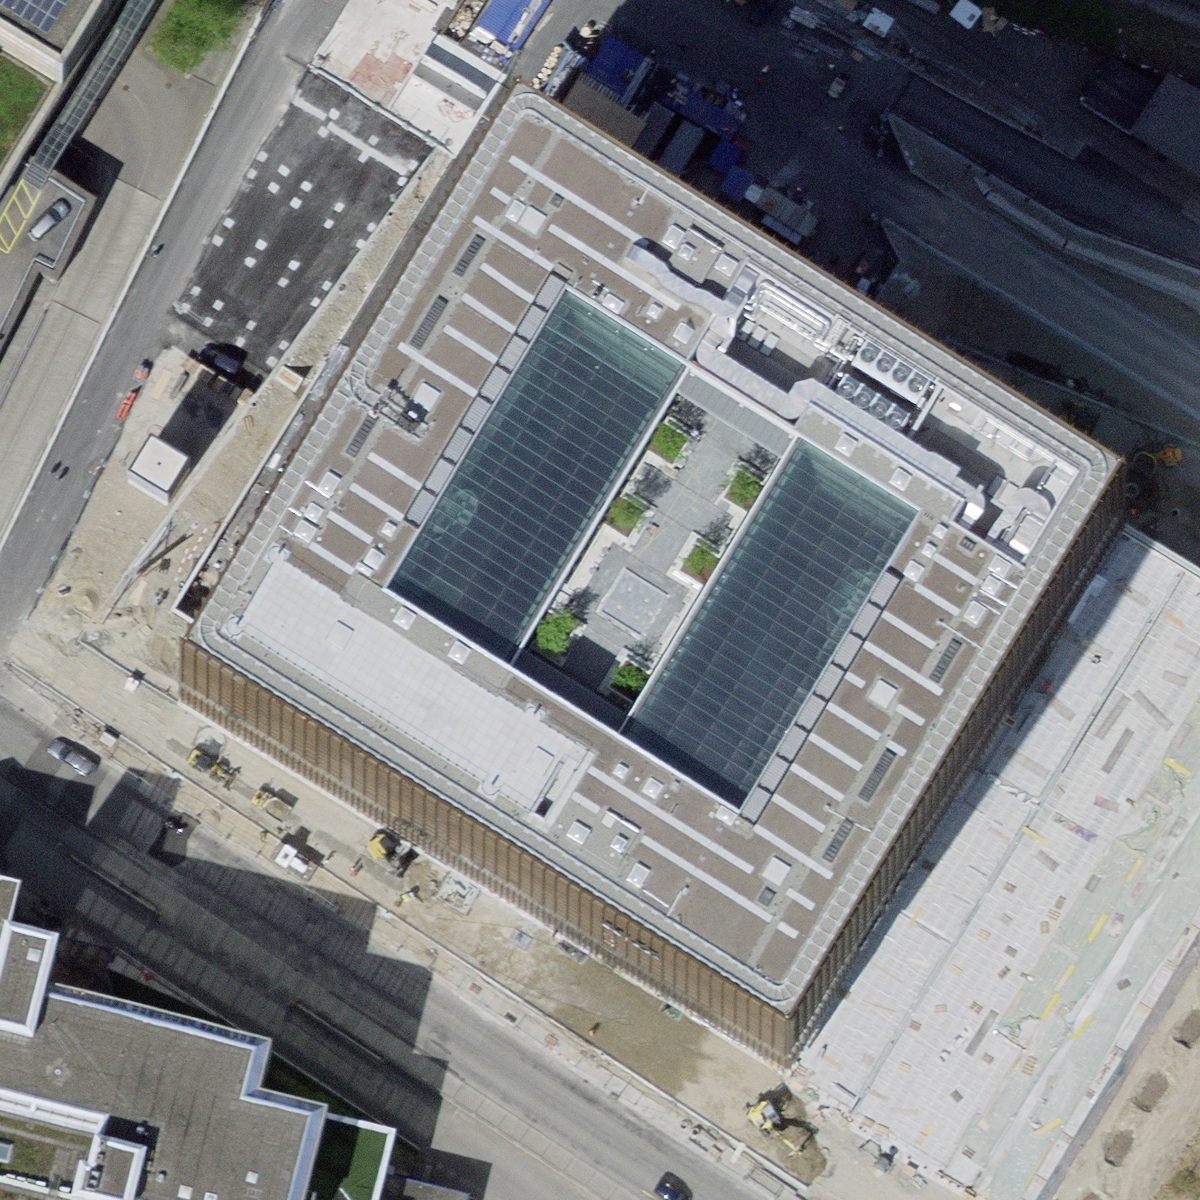

In [24]:
from IPython.display import Image
Image(filename='daten/fhnw.png') 